In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
#input data
x = df.drop('Outcome', axis=1)

#ouput
y = df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

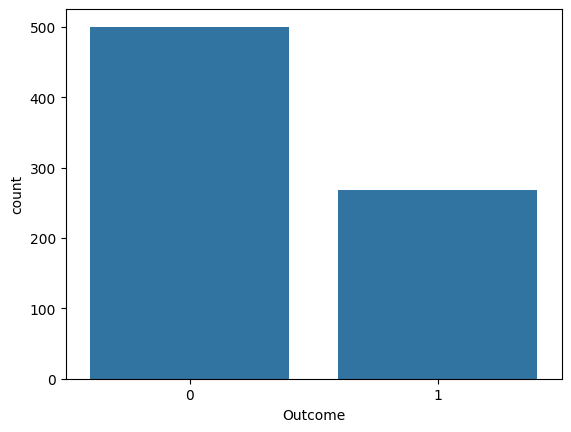

In [4]:
sns.countplot(x=y)

In [5]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [7]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_scaled = sc.fit_transform(x)

In [8]:
x_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [10]:
#cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(x_test)

In [21]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

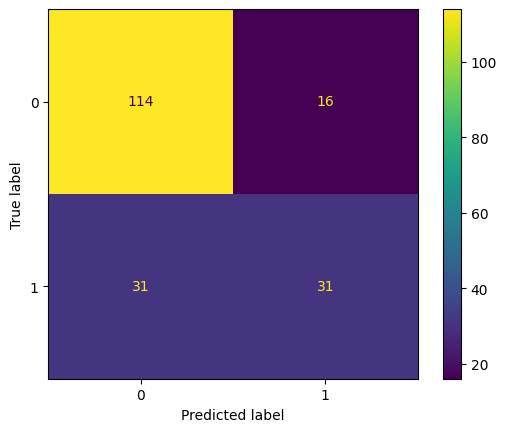

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [23]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

In [27]:
error

[0.328125,
 0.2708333333333333,
 0.24479166666666666,
 0.2708333333333333,
 0.24479166666666666,
 0.2552083333333333,
 0.234375,
 0.24479166666666666,
 0.21875,
 0.24479166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.234375,
 0.23958333333333334,
 0.21875,
 0.21354166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.22395833333333334,
 0.22916666666666666,
 0.234375,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.21354166666666666,
 0.22395833333333334,
 0.22916666666666666,
 0.20833333333333334,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.22395833333333334,
 0.22916666666666666,
 0.22395833333333334]

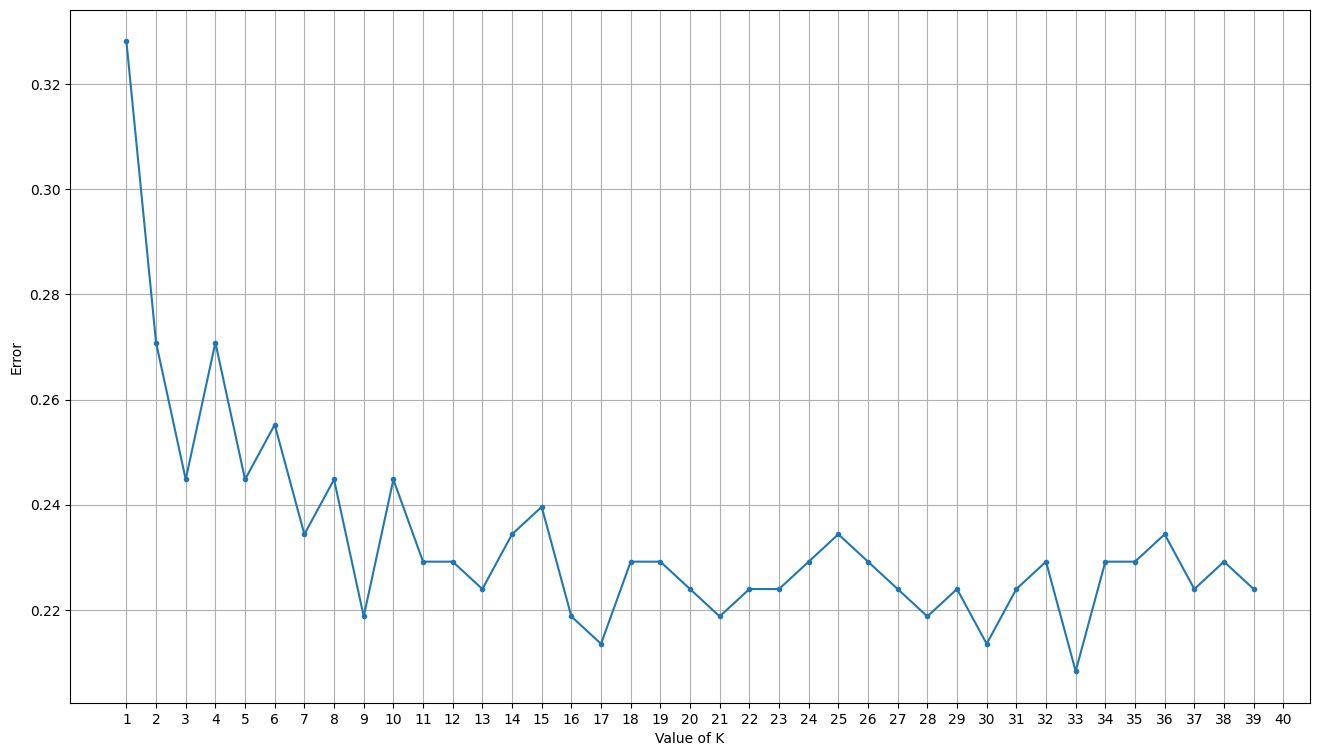

In [37]:
plt.figure(figsize=(16, 9))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1, 41))
plt.plot(range(1,40),error,marker='.')